In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/fish-tracking-dataset/annotations.xml
/kaggle/input/fish-tracking-dataset/fish.csv
/kaggle/input/fish-tracking-dataset/boxes/94.png
/kaggle/input/fish-tracking-dataset/boxes/48.png
/kaggle/input/fish-tracking-dataset/boxes/61.png
/kaggle/input/fish-tracking-dataset/boxes/37.png
/kaggle/input/fish-tracking-dataset/boxes/35.png
/kaggle/input/fish-tracking-dataset/boxes/70.png
/kaggle/input/fish-tracking-dataset/boxes/73.png
/kaggle/input/fish-tracking-dataset/boxes/92.png
/kaggle/input/fish-tracking-dataset/boxes/75.png
/kaggle/input/fish-tracking-dataset/boxes/89.png
/kaggle/input/fish-tracking-dataset/boxes/11.png
/kaggle/input/fish-tracking-dataset/boxes/95.png
/kaggle/input/fish-tracking-dataset/boxes/97.png
/kaggle/input/fish-tracking-dataset/boxes/76.png
/kaggle/input/fish-tracking-dataset/boxes/31.png
/kaggle/input/fish-tracking-dataset/boxes/03.png
/kaggle/input/fish-tracking-dataset/boxes/43.png
/kaggle/input/fish-tracking-dataset/boxes/40.png
/kaggle/input/fish-tr

In [2]:
import os
import shutil
import os
#if not os.path.exists('/kaggle/working/fish-tracking-dataset'):
 #         os.makedirs('/kaggle/working/fish-tracking-dataset')
shutil.copytree('/kaggle/input/fish-tracking-dataset', '/kaggle/working/fish-tracking-dataset')

'/kaggle/working/fish-tracking-dataset'

In [3]:
from IPython.lib.display import exists
import os
import xml.etree.ElementTree as ET

def xml_to_yolo(xml_file, class_id):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    for image_elem in root.findall('image'):
        image_id = image_elem.get('id')
        image_name = image_elem.get('name')
        image_name = image_name.split('images/')[1]
        image_name = image_name.split('.')[0]
        print(image_name)
        image_width = int(image_elem.get('width'))
        image_height = int(image_elem.get('height'))

        yolo_lines = []
        for box_elem in image_elem.findall('box'):
            label = box_elem.get('label')
            occluded = int(box_elem.get('occluded'))
            xtl = float(box_elem.get('xtl'))
            ytl = float(box_elem.get('ytl'))
            xbr = float(box_elem.get('xbr'))
            ybr = float(box_elem.get('ybr'))

            # Calculate center coordinates, width, and height
            center_x = (xtl + xbr) / (2 * image_width)
            center_y = (ytl + ybr) / (2 * image_height)
            width = (xbr - xtl) / image_width
            height = (ybr - ytl) / image_height

            # Create a YOLO line
            yolo_line = f"{class_id} {center_x} {center_y} {width} {height}"

            # Append the YOLO line to the list
            yolo_lines.append(yolo_line)

        # Save YOLO annotations to a text file with the same name as the image_id
        if not os.path.exists('/kaggle/working/train_txt/labels'):
          os.makedirs('/kaggle/working/train_txt/labels')
        txt_file_path = os.path.join('/kaggle/working/train_txt/labels', f"{image_name}.txt")
        with open(txt_file_path, 'w') as txt_file:
            txt_file.write('\n'.join(yolo_lines))

# Directory containing XML annotations
xml_dir = '/kaggle/working/fish-tracking-dataset'

# Define the class ID for the "fish" label
class_id = 0

# Iterate through XML files and convert to YOLO format
for xml_filename in os.listdir(xml_dir):
    if xml_filename.endswith('.xml'):
        xml_path = os.path.join(xml_dir, xml_filename)
        xml_to_yolo(xml_path, class_id)


01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [4]:
import random


def split_train_val_data(txt_files_dir, train_dir, val_dir, val_split_ratio=0.2):
    # Create train and validation directories if they don't exist
    os.makedirs(os.path.join(train_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(train_dir, 'labels'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'images'), exist_ok=True)
    os.makedirs(os.path.join(val_dir, 'labels'), exist_ok=True)

    txt_files = os.listdir(txt_files_dir)
    random.shuffle(txt_files)

    num_val_samples = int(val_split_ratio * len(txt_files))
    val_files = txt_files[:num_val_samples]
    train_files = txt_files[num_val_samples:]

    for val_file in val_files:
        src_txt_path = os.path.join(txt_files_dir, val_file)
        dest_txt_path = os.path.join(val_dir, 'labels', val_file)
        shutil.move(src_txt_path, dest_txt_path)

        # Assuming your image filenames match the annotation filenames with the .jpg extension
        image_filename = os.path.splitext(val_file)[0] + '.jpg'
        src_img_path = os.path.join('/kaggle/working/fish-tracking-dataset/images/', image_filename)
        dest_img_path = os.path.join(val_dir, 'images', image_filename)
        shutil.copy(src_img_path, dest_img_path)

    for train_file in train_files:
        src_txt_path = os.path.join(txt_files_dir, train_file)
        dest_txt_path = os.path.join(train_dir, 'labels', train_file)
        shutil.copy(src_txt_path, dest_txt_path)

        # Assuming your image filenames match the annotation filenames with the .jpg extension
        image_filename = os.path.splitext(train_file)[0] + '.jpg'
        src_img_path = os.path.join('/kaggle/working/fish-tracking-dataset/images/', image_filename)
        dest_img_path = os.path.join(train_dir, 'images', image_filename)
        shutil.move(src_img_path, dest_img_path)

# Directory containing YOLO annotation files
txt_files_dir = '/kaggle/working/train_txt/labels'
train_dir = '/kaggle/working/train'
val_dir = '/kaggle/working/val'

# Split the data into train and validation sets
split_train_val_data(txt_files_dir, train_dir, val_dir, val_split_ratio=0.2)


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 878.7/878.7 kB 12.1 MB/s eta 0:00:0000:0100:01


In [6]:
!pip install pyyaml


In [7]:
from ultralytics import YOLO

# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8s.pt')  # load a pretrained model (recommended for training)
#model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 112MB/s] 


In [8]:
import yaml

# Define your configuration data as a Python dictionary
config = {
    'path': '/kaggle/working',
    'train': 'train/images',  # train images (relative to 'path') 4 images
    'val': 'val/images',      # val images (relative to 'path') 4 images
    'nc': 1,                   # Number of classes
    'names': ['Fish'],         # Class names
    # 'fl_gamma': 2.0          # Uncomment this line if needed
}

# Define the file path where you want to save the YAML file
yaml_file_path = '/kaggle/working/config.yaml'  # Update with your desired path and file name

# Write the YAML data to the file
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(config, yaml_file)

print(f"YAML configuration file saved at: {yaml_file_path}")


YAML configuration file saved at: /kaggle/working/config.yaml


In [11]:
results = model.train(data='/kaggle/working/config.yaml',
                      epochs=20,
                      imgsz=640,
                      pretrained = True ,
                      name= "fish_small",
                      patience = 35,
                      flipud=0.5,
                      batch = 32,
                      optimizer = 'SGD',
                      augment = True
                      )

Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/working/config.yaml, epochs=20, time=None, patience=35, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=fish_small2, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

train: Scanning /kaggle/working/train/labels.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/val/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]

Plotting labels to runs/detect/fish_small2/labels.jpg... 


optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/fish_small2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G     0.7553     0.4151     0.8853        303        640: 100%|██████████| 3/3 [01:34<00:00, 31.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         19        185      0.977      0.929      0.971      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      0.713     0.3944     0.8668        324        640: 100%|██████████| 3/3 [01:35<00:00, 31.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         19        185      0.983      0.929      0.973      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G     0.6951     0.3856     0.8672        253        640: 100%|██████████| 3/3 [01:33<00:00, 31.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.53s/it]

                   all         19        185      0.987      0.924      0.975      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G     0.6803     0.3782     0.8509        303        640: 100%|██████████| 3/3 [01:34<00:00, 31.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.60s/it]

                   all         19        185      0.983      0.929      0.973      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G     0.6175     0.3555     0.8434        267        640: 100%|██████████| 3/3 [01:34<00:00, 31.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]

                   all         19        185      0.988      0.928      0.973       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G     0.6931     0.3752     0.8504        342        640: 100%|██████████| 3/3 [01:35<00:00, 31.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]

                   all         19        185      0.965      0.941      0.972      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G       0.64     0.3586     0.8478        263        640: 100%|██████████| 3/3 [01:33<00:00, 31.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.49s/it]

                   all         19        185      0.967      0.937      0.973       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G     0.6822     0.3757     0.8553        285        640: 100%|██████████| 3/3 [01:34<00:00, 31.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.57s/it]

                   all         19        185      0.971      0.941      0.973      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.6375     0.3573      0.838        256        640: 100%|██████████| 3/3 [01:34<00:00, 31.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.44s/it]

                   all         19        185      0.966      0.946      0.973      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G     0.6273     0.3582      0.853        233        640: 100%|██████████| 3/3 [01:33<00:00, 31.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]

                   all         19        185      0.972      0.941      0.974      0.829


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.6976     0.3921     0.8605        139        640: 100%|██████████| 3/3 [01:31<00:00, 30.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]

                   all         19        185      0.984       0.93      0.976      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.6918     0.3717     0.8591        148        640: 100%|██████████| 3/3 [01:31<00:00, 30.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         19        185      0.988      0.914      0.974      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.6939     0.3752     0.8576        138        640: 100%|██████████| 3/3 [01:33<00:00, 31.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.41s/it]

                   all         19        185      0.966      0.933      0.969      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.6523     0.3642     0.8378        137        640: 100%|██████████| 3/3 [01:34<00:00, 31.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         19        185      0.977      0.919      0.967       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G     0.6366     0.3496     0.8304        138        640: 100%|██████████| 3/3 [01:32<00:00, 30.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]

                   all         19        185      0.975      0.924      0.972      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.6317     0.3489     0.8386        129        640: 100%|██████████| 3/3 [01:30<00:00, 30.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.47s/it]

                   all         19        185      0.977      0.928      0.972      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.6147     0.3394     0.8289        128        640: 100%|██████████| 3/3 [01:32<00:00, 30.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.48s/it]

                   all         19        185      0.978      0.945      0.975      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.6389     0.3508     0.8468        149        640: 100%|██████████| 3/3 [01:37<00:00, 32.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.51s/it]

                   all         19        185      0.962      0.948      0.975      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.6053     0.3332      0.844        133        640: 100%|██████████| 3/3 [01:31<00:00, 30.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.46s/it]

                   all         19        185      0.979      0.935      0.973      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.6638     0.3569     0.8461        155        640: 100%|██████████| 3/3 [01:30<00:00, 30.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.42s/it]

                   all         19        185      0.983       0.94      0.973      0.829



20 epochs completed in 0.552 hours.
Optimizer stripped from runs/detect/fish_small2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/fish_small2/weights/best.pt, 22.5MB

Validating runs/detect/fish_small2/weights/best.pt...
Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.28s/it]


                   all         19        185      0.991      0.897      0.968      0.816
Speed: 0.8ms preprocess, 469.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/fish_small2


In [12]:
model = YOLO('/kaggle/working/runs/detect/fish_small2/weights/best.pt')
results = model.val()
for i in [0.25,0.15,0.05]:
  results = model.val(name= f'cofidence: {i}', conf= i , iou=0.8)

Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /kaggle/working/val/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.18s/it]


                   all         19        185      0.983       0.93      0.976      0.835
Speed: 0.9ms preprocess, 207.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val
Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)


val: Scanning /kaggle/working/val/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]


                   all         19        185      0.983      0.924      0.961      0.845
Speed: 0.8ms preprocess, 204.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/cofidence: 0.25
Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)


val: Scanning /kaggle/working/val/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]


                   all         19        185      0.981      0.924      0.963      0.844
Speed: 1.4ms preprocess, 202.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/cofidence: 0.15
Ultralytics 8.3.25 🚀 Python-3.10.14 torch-2.4.0+cpu CPU (Intel Xeon 2.20GHz)


val: Scanning /kaggle/working/val/labels.cache... 19 images, 0 backgrounds, 0 corrupt: 100%|██████████| 19/19 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.13s/it]


                   all         19        185      0.981      0.924      0.977      0.851
Speed: 0.8ms preprocess, 203.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/cofidence: 0.05


In [13]:
model = YOLO('/kaggle/working/runs/detect/fish_small2/weights/best.pt')

In [15]:
import pandas as pd
import numpy as np
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
import os
warnings.simplefilter('ignore')

In [23]:
def video_to_images(video_path, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Capture the video
    cap = cv2.VideoCapture(video_path)
    
    # Check if the video was opened successfully
    if not cap.isOpened():
        print(f"Error: Could not open video file {video_path}")
        return

    frame_count = 0

    while True:
        ret, frame = cap.read()
        if not ret:
            break  # Break the loop if there are no frames to read

        # Construct the image file name
        image_file_name = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
        
        # Save the current frame as an image
        cv2.imwrite(image_file_name, frame)
        print(f"Saved: {image_file_name}")

        frame_count += 1

    # Release the video capture object
    cap.release()
    print("Done converting video to images.")

# Example usage
video_path = '/kaggle/input/fishes/video5843490472940542248.mp4'  # Replace with your video file path
output_folder = '/kaggle/working/extracted_frames'  # Save images in the writable working directory
video_to_images(video_path, output_folder)

Saved: /kaggle/working/extracted_frames/frame_0000.jpg
Saved: /kaggle/working/extracted_frames/frame_0001.jpg
Saved: /kaggle/working/extracted_frames/frame_0002.jpg
Saved: /kaggle/working/extracted_frames/frame_0003.jpg
Saved: /kaggle/working/extracted_frames/frame_0004.jpg
Saved: /kaggle/working/extracted_frames/frame_0005.jpg
Saved: /kaggle/working/extracted_frames/frame_0006.jpg
Saved: /kaggle/working/extracted_frames/frame_0007.jpg
Saved: /kaggle/working/extracted_frames/frame_0008.jpg
Saved: /kaggle/working/extracted_frames/frame_0009.jpg
Saved: /kaggle/working/extracted_frames/frame_0010.jpg
Saved: /kaggle/working/extracted_frames/frame_0011.jpg
Saved: /kaggle/working/extracted_frames/frame_0012.jpg
Saved: /kaggle/working/extracted_frames/frame_0013.jpg
Saved: /kaggle/working/extracted_frames/frame_0014.jpg
Saved: /kaggle/working/extracted_frames/frame_0015.jpg
Saved: /kaggle/working/extracted_frames/frame_0016.jpg
Saved: /kaggle/working/extracted_frames/frame_0017.jpg
Saved: /ka

Saved: /kaggle/working/extracted_images/sampled_image_1.jpg
Saved: /kaggle/working/extracted_images/sampled_image_2.jpg
Saved: /kaggle/working/extracted_images/sampled_image_3.jpg
Saved: /kaggle/working/extracted_images/sampled_image_4.jpg


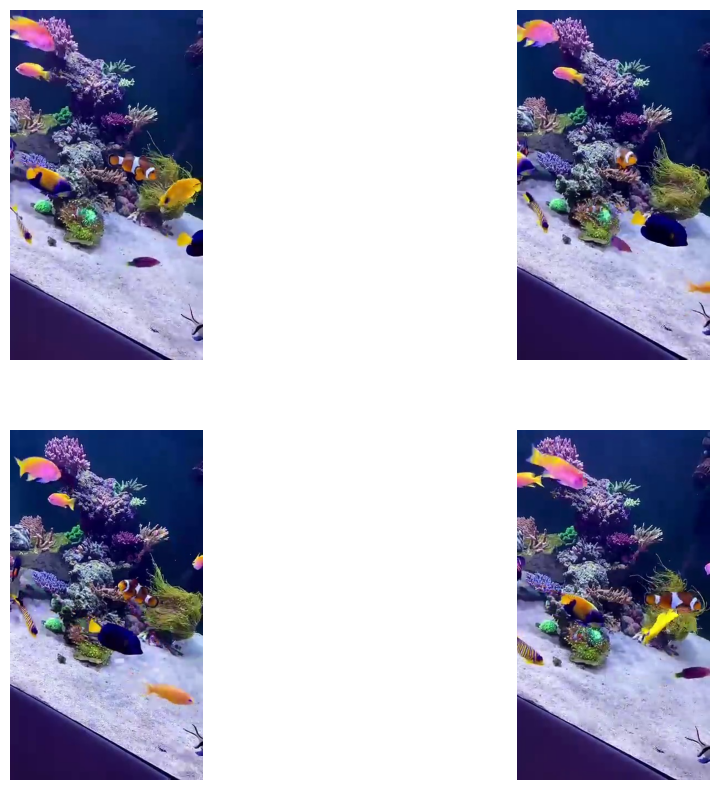

In [27]:
import glob
import random
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np  # Import numpy

# Paths and parameters
root_path = '/kaggle/working/extracted_frames/*'  # Path to the input images
output_folder = '/kaggle/working/extracted_images'  # Define the output folder
num_samples = 4  # Number of images to sample

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Load images from the specified path
images_data = glob.glob(root_path)

# Adjust num_samples if it exceeds the available images
num_samples = min(num_samples, len(images_data))

# If there are images, proceed with sampling and displaying
if num_samples > 0:
    random_images = random.sample(images_data, num_samples)

    # Display the images and save them to the output folder
    plt.figure(figsize=(12, 10))
    for i in range(num_samples):
        img = cv2.imread(random_images[i])
        
        # Check if the image was loaded successfully
        if img is not None:
            # Save image to the output folder
            output_image_path = os.path.join(output_folder, f"sampled_image_{i+1}.jpg")
            cv2.imwrite(output_image_path, img)

            # Convert BGR to RGB for matplotlib display
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(2, 2, i + 1)
            plt.imshow(img_rgb)
            plt.axis('off')
            print(f"Saved: {output_image_path}")
        else:
            print(f"Warning: Unable to load image at {random_images[i]}")

    plt.show()
else:
    print("No images found in the specified path.")


In [28]:
# List to store images after processing with YOLO
images = []

# Loop over sampled images and use YOLO model for detection
for i in range(num_samples):
    yolo_outputs = model.predict(random_images[i])  # Use 'random_images' here
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names
    print('**********************')
    print(f"In this image {len(box)} fish has been detected.")

    for j in range(len(box)):
        labels = names[int(box.cls[j].item())]  # Corrected index access
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        print(f'Fish {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')
        
    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])  # Convert BGR to RGB if needed for further use


image 1/1 /kaggle/working/extracted_frames/frame_0067.jpg: 640x352 10 Fishs, 263.7ms
Speed: 1.6ms preprocess, 263.7ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 352)
**********************
In this image 10 fish has been detected.
Fish 1 is: Fish
Coordinates are: [7.97210693359375, 95.24795532226562, 73.79045104980469, 132.0692138671875]
Confidence is: 0.84
-------
Fish 2 is: Fish
Coordinates are: [211.12118530273438, 449.943359375, 279.60821533203125, 472.1317138671875]
Confidence is: 0.83
-------
Fish 3 is: Fish
Coordinates are: [320.17181396484375, 399.48248291015625, 352.0, 452.5308837890625]
Confidence is: 0.76
-------
Fish 4 is: Fish
Coordinates are: [6.271331787109375, 284.83428955078125, 120.2540283203125, 338.61956787109375]
Confidence is: 0.75
-------
Fish 5 is: Fish
Coordinates are: [0.03345012664794922, 227.11550903320312, 10.594436645507812, 283.8913269042969]
Confidence is: 0.67
-------
Fish 6 is: Fish
Coordinates are: [330.4686279296875, 571.307739257812

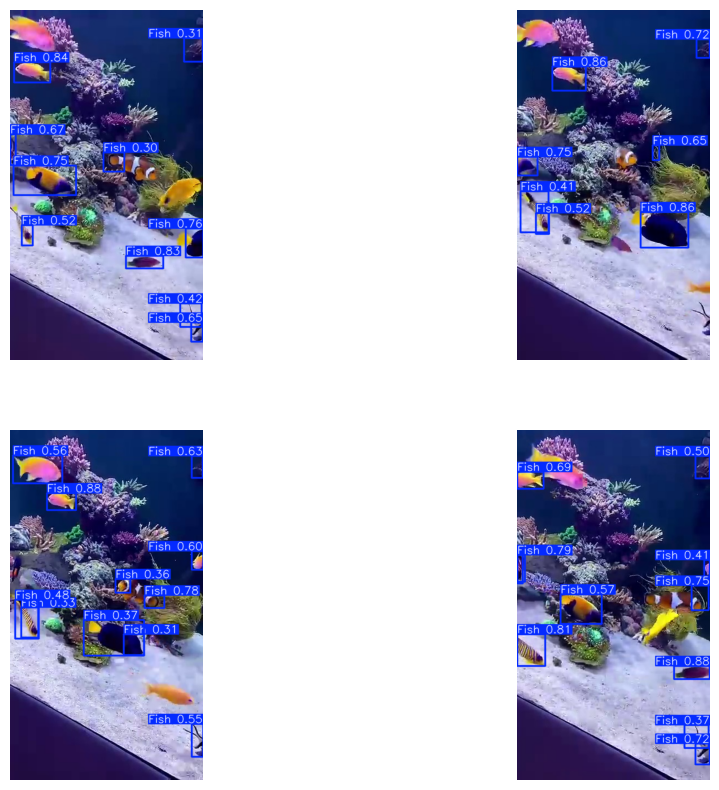

In [29]:
plt.figure(figsize=(12,10))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off') 

In [30]:
result = pd.read_csv('/kaggle/working/runs/detect/fish_small2/results.csv')
result.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,107.644,0.75532,0.41506,0.88533,0.97726,0.92924,0.97103,0.78904,0.71734,0.40474,0.89111,0.098200,0.000200,0.000200
1,2,208.474,0.71297,0.39439,0.86680,0.98285,0.92949,0.97272,0.80611,0.69547,0.39353,0.88306,0.095475,0.000475,0.000475
2,3,307.446,0.69512,0.38562,0.86717,0.98654,0.92432,0.97499,0.81211,0.67852,0.38405,0.87646,0.092721,0.000721,0.000721
3,4,407.362,0.68030,0.37816,0.85094,0.98285,0.92910,0.97279,0.81485,0.67008,0.37971,0.87366,0.089937,0.000937,0.000937
4,5,507.360,0.61753,0.35547,0.84340,0.98849,0.92841,0.97290,0.82022,0.66485,0.36803,0.87419,0.087123,0.001123,0.001123


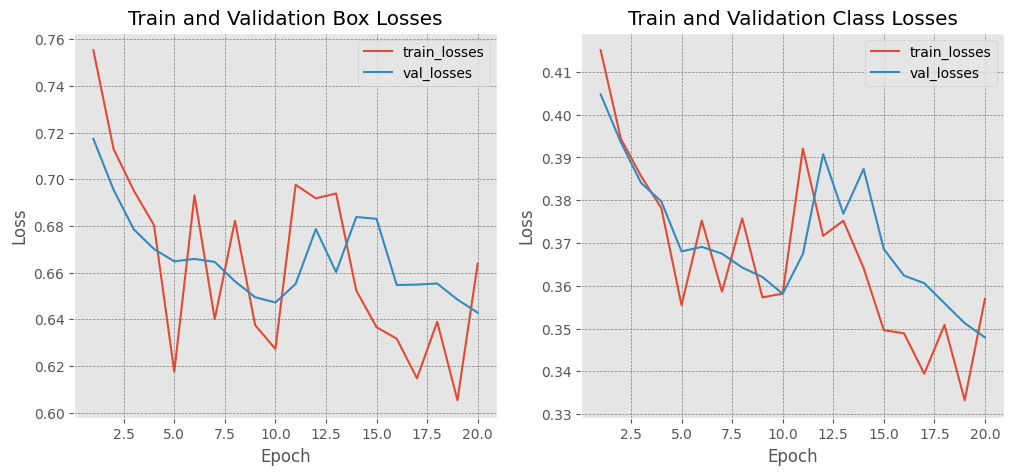

In [31]:
# Remove leading and trailing spaces from column names
result.columns = result.columns.str.strip()

epoch_column = result['epoch']
box_train_losses = result['train/box_loss']
box_val_losses = result['val/box_loss']
cls_train_losses = result['train/cls_loss']
cls_val_losses = result['val/cls_loss']

plt.figure(figsize=(12,5))
plt.style.use('ggplot')  # You can choose a style you prefer
plt.subplot(1,2,1)
plt.plot(epoch_column, box_train_losses, label='train_losses')
plt.plot(epoch_column, box_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')# Add a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Box Losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_column, cls_train_losses, label='train_losses')
plt.plot(epoch_column, cls_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')# Add a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Class Losses')
plt.legend()
plt.show()

(-0.5, 2399.5, 1199.5, -0.5)

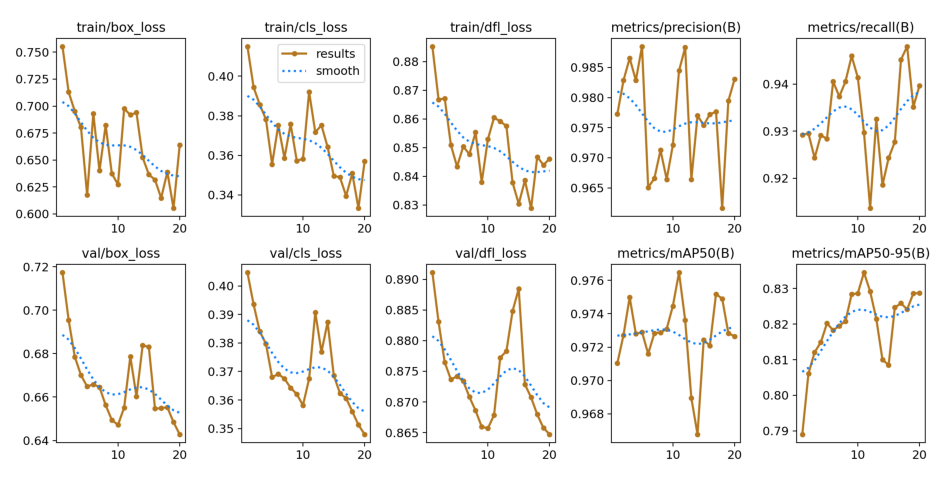

In [32]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('/kaggle/working/runs/detect/fish_small2/results.png'))
plt.axis('off')